In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 

In [2]:
file_path = './netflix_IMDB.csv'
df = pd.read_csv(file_path, index_col=0)

### EDA

In [3]:
# vista previa de los datos
df.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5283 non-null   object 
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   description        5278 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  2998 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 454.0+ KB


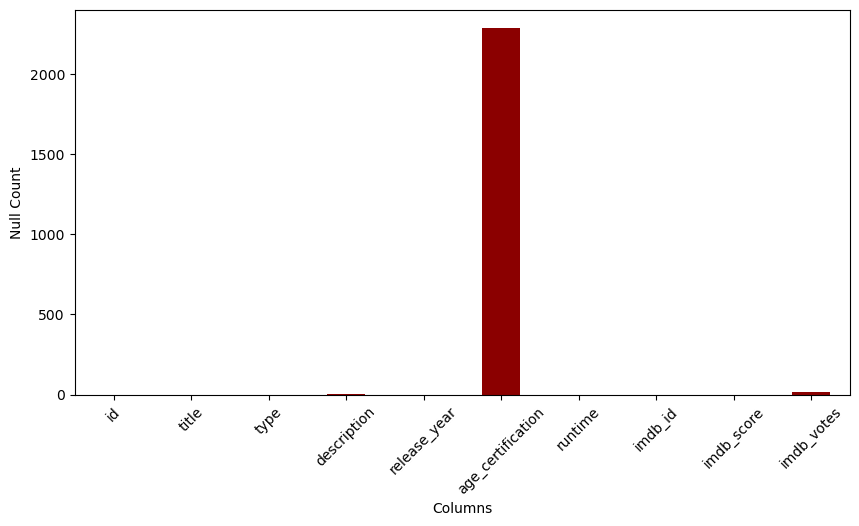

In [5]:
#number of null
null_count = df.isnull().sum()
null_count.plot(kind='bar', figsize=(10,5), color=('darkred'))
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation=45)

plt.show()

In [6]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


### separate dataframes by Type (Movie or TV Show)

In [7]:
dfs = dict(tuple(df.groupby('type')))
df_movie = dfs['MOVIE']
df_show = dfs['SHOW']

In [8]:
#movies
df_movie.describe()

,release_year,runtime,imdb_score,imdb_votes
count,3407.000000,3407.000000,3407.000000,3.391000e+03
mean,2015.203111,101.537423,6.266980,2.668322e+04
std,8.222812,27.761996,1.117282,9.471002e+04
min,1953.000000,8.000000,1.500000,5.000000e+00
25%,2014.000000,88.000000,5.600000,5.730000e+02
50%,2018.000000,100.000000,6.400000,2.632000e+03
75%,2020.000000,116.000000,7.100000,1.228100e+04
max,2022.000000,235.000000,9.000000,2.268288e+06


In [9]:
df_show.describe()

,release_year,runtime,imdb_score,imdb_votes
count,1876.000000,1876.000000,1876.000000,1.876000e+03
mean,2017.109275,38.632729,7.017377,1.748556e+04
std,5.182154,17.692815,1.079717,7.107211e+04
min,1969.000000,0.000000,1.600000,5.000000e+00
25%,2016.000000,24.000000,6.400000,4.445000e+02
50%,2018.000000,41.000000,7.200000,1.782000e+03
75%,2020.000000,49.000000,7.800000,7.216750e+03
max,2022.000000,178.000000,9.600000,1.727694e+06


distribución normal: 1.1171
media: 6.27


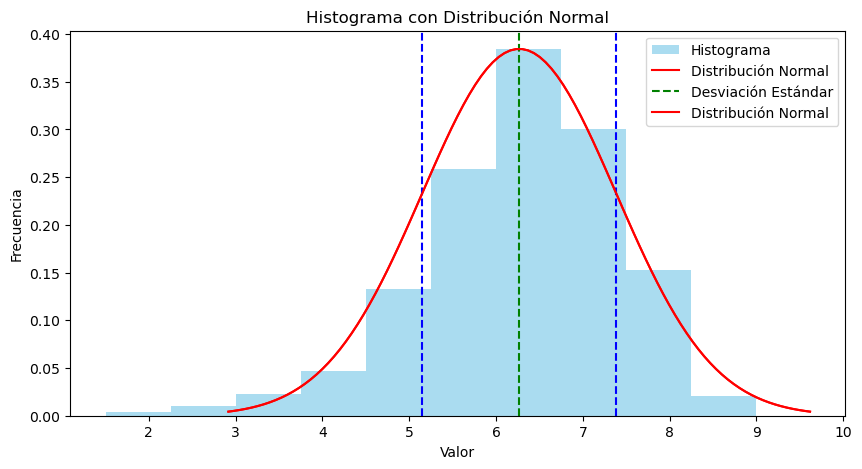

In [22]:
data = df_movie['imdb_score']

plt.figure(figsize=(10, 5))

# Graficar el histograma y obtener información sobre el eje Y
n, bins, patches = plt.hist(data, bins=10, density=True, color='skyblue', alpha=0.7, label='Histograma')
max_height = max(n)

# Calcular distribución normal
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf_values = norm.pdf(x, mu, sigma)

# Normalizar la distribución normal
normalized_values = pdf_values / pdf_values.max() * max_height

# Graficar la distribución normal normalizada
plt.plot(x, normalized_values, color='red', label='Distribución Normal')
plt.axvline(x=mu, color='green', linestyle='--', label='Desviación Estándar')

plt.axvline(x=mu + sigma, color='blue', linestyle='--',)
plt.axvline(x=mu - sigma, color='blue', linestyle='--',)

# distribución normal
print(f"distribución normal: {round(np.std(data),4)}")
print(f"media: {round(np.mean(data),2)}")

# Graficar la distribución normal normalizada
plt.plot(x, normalized_values, color='red', label='Distribución Normal')

plt.title('Histograma con Distribución Normal')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<b>Distribución Normal</b>: Es una distribución continua y simétrica que describe muchos fenómenos naturales. Está caracterizada por su forma de campana (curva de campana) y está definida por dos parámetros: la media y la desviación estándar. En una distribución normal, la media, la mediana y la moda son iguales, y aproximadamente el 68% de los datos caen dentro de una desviación estándar de la media, el 95% dentro de dos desviaciones estándar y el 99.7% dentro de tres desviaciones estándar. La función de densidad de probabilidad de una distribución normal es simétrica alrededor de la media.

<b>Distribución de la Columna (KDE)</b>: La distribución de la columna que se muestra con KDE es una estimación suavizada de la distribución real de los datos en la columna. Esta técnica utiliza un kernel (usualmente una función gaussiana) para estimar la forma de la distribución subyacente de los datos. El KDE proporciona una forma visual de la distribución de los datos, ofreciendo información sobre la forma y la tendencia de la distribución de los datos observados.

Distribución Normalizada: Normalizar una distribución implica ajustar sus valores para que estén en una escala específica o estandarizarlos. En el contexto de la gráfica que has generado, se ha normalizado la distribución normal (representada en rojo) dividiendo sus valores por el valor máximo en el eje Y y multiplicándolos por la altura máxima del histograma. Esta normalización permite comparar visualmente la distribución normal con la escala del histograma.

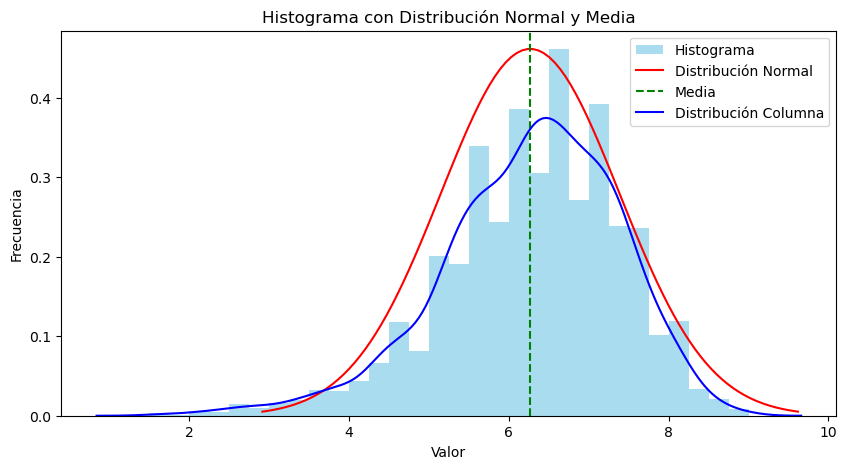

In [ ]:
data = df_movie['imdb_score']

plt.figure(figsize=(10, 5))

# Graficar el histograma y obtener información sobre el eje Y
n, bins, patches = plt.hist(data, bins=30, density=True, color='skyblue', alpha=0.7, label='Histograma')
max_height = max(n)

# Calcular distribución normal
mu, sigma = np.mean(data), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf_values = norm.pdf(x, mu, sigma)

# Normalizar la distribución normal
normalized_values = pdf_values / pdf_values.max() * max_height

# Graficar la distribución normal normalizada
plt.plot(x, normalized_values, color='red', label='Distribución Normal')

# Graficar una línea vertical en el valor de la media (mu)
plt.axvline(x=mu, color='green', linestyle='--', label='Media')

# Estimación de densidad kernel (KDE) para la distribución de la columna original
sns.kdeplot(data, color='blue', label='Distribución Columna')

plt.title('Histograma con Distribución Normal y Media')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


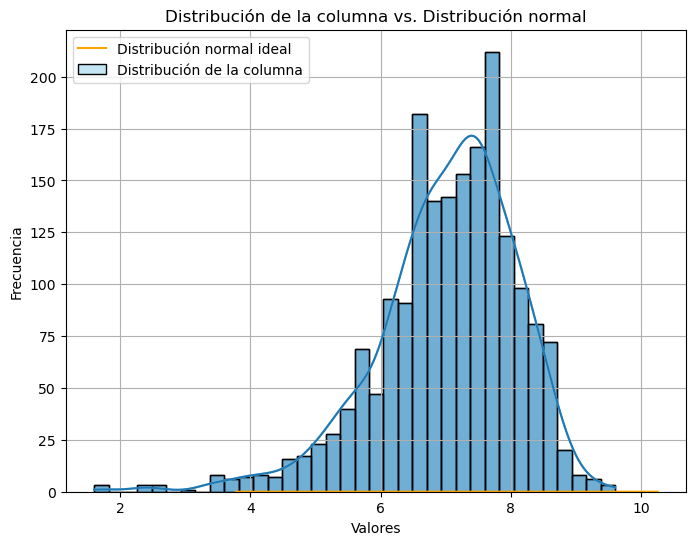

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Supongamos que 'df' es tu DataFrame y 'columna' es la columna que quieres graficar
data = df_show['imdb_score']

# Crear el gráfico de distribución
plt.figure(figsize=(8, 6))

# Graficar la distribución de la columna
sns.histplot(data, kde=True, color='skyblue', label='Distribución de la columna')

# Graficar la distribución normal ideal (media y desviación estándar de la columna)
mu, sigma = data.mean(), data.std()
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
# Normalizar la distribución normal ideal con la altura máxima del histograma
norm_values = norm.pdf(x, mu, sigma) / (sns.histplot(data, kde=True).get_lines()[0].get_ydata().max())
plt.plot(x, norm_values, label='Distribución normal ideal', color='orange')

plt.title('Distribución de la columna vs. Distribución normal')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()
